In [90]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pylab as pl
from scipy.stats import norm
import statistics

%store -r Data_Set

import math
import seaborn as sns

import os

import torch
import torchvision
from torch import nn

import embedding_retriever as er
import csv

In [91]:
n = 0
for i in Data_Set.items():
    print(i,"\n")
    n += 1
    if n == 5:
        break

('43dd0641-8b1c-59b6-bf31-34e51c555761', {'Year': [2018, 2017, 2016, 2015, 2014], 'Sector': '"713210"', 'R': [72573907, 72318836, 68191837, 62567540, 61064684], 'EBITDA': [5334401, 6084786, 7645315, 5499604, 4643608], 'NDE': [-0.0, 0.2, 0.7, -0.0, 0.9], 'TDE': [23, 35, 49, 23, 43]}) 

('6e8f931b-af06-5f86-a4ba-2176912af400', {'Year': [2018, 2017, 2016, 2015, 2014], 'Sector': '"524126"', 'R': [1466336000, 1275713000, 1179796000, 1052805000, 1000062999], 'EBITDA': [65173000, 98141000, 129672000, 138775000, 150208000], 'NDE': [1.0, 1.6, 1.5, 1.3, 1.1], 'TDE': [22, 21, 22, 24, 25]}) 

('51b7c557-7662-577b-a635-5a268961910a', {'Year': [2020, 2019, 2018, 2017, 2016], 'Sector': '"45411"', 'R': [63324, 163740, 159672, 86075, 67964], 'EBITDA': [-5385, -237467, -488578, -765968, -540626], 'NDE': [-92.0, -2.0, -1.0, 0.0, 0.2], 'TDE': [-68, -69, -126, 105, 36]}) 

('b735464c-bbb0-5740-ac31-3b43884bfedf', {'Year': [2016, 2015, 2014, 2013, 2012], 'Sector': '"334519"', 'R': [63311000, 60754000, 64474

In [92]:
print(len(Data_Set))

7440


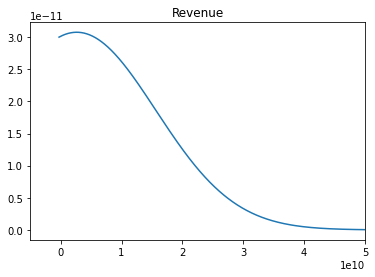

In [35]:
H = []

for i in Data_Set.values():
    for j in i[5]:
        H.append(j)
H.sort()
fit = stats.norm.pdf(H, np.mean(H), np.std(H))  #this is a fitting indeed

plt.xlim(-5000000000,50000000000)
plt.plot(H,fit)
plt.title("Revenue")
plt.show()   

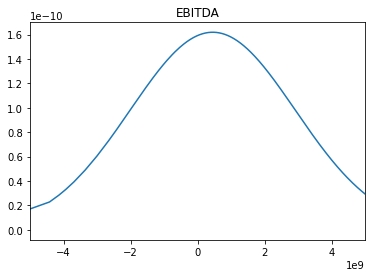

In [36]:
H = []

for i in Data_Set.values():
    for j in i[7]:
        H.append(j)
H.sort()
fit = stats.norm.pdf(H, np.mean(H), np.std(H))  #this is a fitting indeed

plt.xlim(-5000000000,5000000000)
plt.plot(H,fit)
plt.title("EBITDA")
plt.show()    

In [37]:
def Shifted_MinMax_Normalize(Data, normalizedMin, normalizedMax):
    
    Data_Set = Data.copy()
    
    R_Min = list(Data_Set.values())[0][5][1]
    R_Max = list(Data_Set.values())[0][5][1]
    
    E_Min = list(Data_Set.values())[0][7][1]
    E_Max = list(Data_Set.values())[0][7][1]
    
    for i in Data_Set.values():
        for j in range(len(i[5])):
            if i[5][j] < R_Min:
                R_Min = i[5][j]
            elif i[5][j] > R_Max:
                R_Max = i[5][j]
                
    print("R_Min", R_Min)
    
    for i in Data_Set.values():
        for j in range(len(i[7])):
            if i[7][j] < E_Min:
                E_Min = i[7][j]
            elif i[7][j] > E_Max:
                E_Max = i[7][j]
                
    print("E_Min", E_Min)
                
    for i in Data_Set.values():
        for j in range(len(i[5])):              
            mx = (i[5][j] - R_Min)/(R_Max - R_Min)
            preshiftNormalized = mx*(normalizedMax-normalizedMin);
            i[5][j] = round(preshiftNormalized + normalizedMin, 6)
    
    for i in Data_Set.values():
        for j in range(len(i[7])):              
            mx = (i[7][j] - E_Min)/(E_Max - E_Min)
            preshiftNormalized = mx*(normalizedMax-normalizedMin);
            i[7][j] = round(preshiftNormalized + normalizedMin, 6)

    return Data_Set


# SMMN_Data_Set = Shifted_MinMax_Normalize(Data_Set,0,10)

# n = 0
# for i in SMMN_Data_Set.items():
#     print(i,"\n")
#     n += 1
#     if n == 5:
#         break

In [38]:
Sector_List = ["511210", "2111", "325412"]

In [77]:
def Data_Set_Normalised(Data_Set):
    
    Data_Set_N = {}
    
    for i in Data_Set.items():
        ID,data = i
        
        Data_Set_N[ID] = {'Sector': data['Sector']}
        
        Data_Set_N[ID].update({'Revenue' : []})
        for j in data['R']:
            if j < 0:
                Data_Set_N[ID]['Revenue'].append(0)
            elif j in range(0,5000000):
                Data_Set_N[ID]['Revenue'].append(0.1)
            elif j in range(5000000,10000000):
                Data_Set_N[ID]['Revenue'].append(0.2)
            elif j in range(10000000,50000000):
                Data_Set_N[ID]['Revenue'].append(0.3)
            elif j in range(50000000,100000000):
                Data_Set_N[ID]['Revenue'].append(0.4)
            elif j in range(100000000,500000000):
                Data_Set_N[ID]['Revenue'].append(0.5)
            elif j in range(500000000,1000000000):
                Data_Set_N[ID]['Revenue'].append(0.6)
            elif j in range(1000000000,5000000000):
                Data_Set_N[ID]['Revenue'].append(0.7)
            elif j in range(5000000000,10000000000):
                Data_Set_N[ID]['Revenue'].append(0.8)
            elif j > 10000000000:
                Data_Set_N[ID]['Revenue'].append(0.9)
                
        
        Data_Set_N[ID].update({'EBITDA' : []})
        for j in data['EBITDA']:
            if j < 0:
                Data_Set_N[ID]['EBITDA'].append(0)
            elif j in range(0,5000000):
                Data_Set_N[ID]['EBITDA'].append(0.1)
            elif j in range(5000000,10000000):
                Data_Set_N[ID]['EBITDA'].append(0.2)
            elif j in range(10000000,50000000):
                Data_Set_N[ID]['EBITDA'].append(0.3)
            elif j in range(50000000,100000000):
                Data_Set_N[ID]['EBITDA'].append(0.4)
            elif j in range(100000000,500000000):
                Data_Set_N[ID]['EBITDA'].append(0.5)
            elif j in range(500000000,1000000000):
                Data_Set_N[ID]['EBITDA'].append(0.6)
            elif j in range(1000000000,5000000000):
                Data_Set_N[ID]['EBITDA'].append(0.7)
            elif j in range(5000000000,10000000000):
                Data_Set_N[ID]['EBITDA'].append(0.8)
            elif j > 10000000000:
                Data_Set_N[ID]['EBITDA'].append(0.9)
                
            
        Data_Set_N[ID].update({'NDE' : []})
        for j in data['NDE']:
            if j < 0 or j > 1:
                Data_Set_N[ID]['NDE'].append(0)
            else:
                Data_Set_N[ID]['NDE'].append(round(1 - j,4))
          
        
        Data_Set_N[ID].update({'TDE' : []})
        for j in data['TDE']:
            if j < 0 or j > 100:
                Data_Set_N[ID]['TDE'].append(0)
            else:
                Data_Set_N[ID]['TDE'].append(round(100 - j,4)/100)
                
        
        
    return Data_Set_N
    
    
Data_Set_N = Data_Set_Normalised(Data_Set)

In [78]:
%store Data_Set_N

Stored 'Data_Set_N' (dict)


In [80]:
n = 0
for i in Data_Set_N.items():
    print(i,"\n")
    n += 1
    if n == 5:
        break

('43dd0641-8b1c-59b6-bf31-34e51c555761', {'Sector': '"713210"', 'Revenue': [0.4, 0.4, 0.4, 0.4, 0.4], 'EBITDA': [0.2, 0.2, 0.2, 0.2, 0.1], 'NDE': [1.0, 0.8, 0.3, 1.0, 0.1], 'TDE': [0.77, 0.65, 0.51, 0.77, 0.57]}) 

('6e8f931b-af06-5f86-a4ba-2176912af400', {'Sector': '"524126"', 'Revenue': [0.7, 0.7, 0.7, 0.7, 0.7], 'EBITDA': [0.4, 0.4, 0.5, 0.5, 0.5], 'NDE': [0.0, 0, 0, 0, 0], 'TDE': [0.78, 0.79, 0.78, 0.76, 0.75]}) 

('51b7c557-7662-577b-a635-5a268961910a', {'Sector': '"45411"', 'Revenue': [0.1, 0.1, 0.1, 0.1, 0.1], 'EBITDA': [0, 0, 0, 0, 0], 'NDE': [0, 0, 0, 1.0, 0.8], 'TDE': [0, 0, 0, 0, 0.64]}) 

('b735464c-bbb0-5740-ac31-3b43884bfedf', {'Sector': '"334519"', 'Revenue': [0.4, 0.4, 0.4, 0.4, 0.3], 'EBITDA': [0.2, 0.2, 0.2, 0.2, 0.2], 'NDE': [1.0, 1.0, 1.0, 0.5, 0.5], 'TDE': [1.0, 0.92, 0.87, 0.78, 0.66]}) 

('6800bdd9-4bcf-59db-81fc-725616185422', {'Sector': '"518210"', 'Revenue': [0.5, 0.5, 0.6, 0.6, 0.5], 'EBITDA': [0.5, 0.5, 0.4, 0.5, 0.5], 'NDE': [0.0, 0, 0, 0, 0], 'TDE': [0, 0,

In [81]:
print(len(Data_Set_N))

7440


In [82]:
embedder = er.EmbeddingRetriever()

with open('Description.csv','r') as file:
    next(file)
    file = csv.reader(file, delimiter = ';')

    EN_Des = {}
    for row in file:
        try:
            ID,sector,description = row[0].split(",", 2)
            ID = ID[1:-1]
            if ID in Data_Set_N.keys():
                sector = sector[1:-1]
                if description == '"\n':
                    description = " "

                EN_Des[ID] = {}
                EN_Des[ID].update({'Sector' : sector, 'Description' : description[1:-2]})
                EN_Des[ID].update({'Description Emb' : np.round(embedder.get_bert_embedding(description[1:-2]),4)})


        except ValueError:
            continue
        
n = 0
for i in EN_Des.items():
    print(i,"\n")
    n += 1
    if n == 5:
        break

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (

('e809884c-8121-52f8-806c-6d1b86adae2e', {'Sector': '511210', 'Description': 'Forescout Technologies, Inc. provides device visibility and control solution', 'Description Emb': array([[ 5.7600e-01,  7.7410e-01,  8.9120e-01,  7.5210e-01,  1.1872e+00,
         6.7610e-01,  2.7440e-01,  1.0162e+00,  8.5640e-01,  6.3140e-01,
         4.3880e-01,  2.7280e-01,  7.2570e-01,  1.8619e+00,  5.3800e-01,
         1.2024e+00,  2.8100e-01,  9.9480e-01,  5.8390e-01,  6.9910e-01,
         4.3010e-01,  4.7800e-02,  7.4360e-01,  1.4881e+00,  9.0410e-01,
         6.2760e-01,  2.2730e-01,  3.8470e-01,  2.5190e-01,  8.9040e-01,
         7.7160e-01,  9.8240e-01,  9.1970e-01,  4.1410e-01,  5.5550e-01,
         3.5180e-01,  3.0050e-01,  5.6390e-01,  6.5250e-01,  7.1340e-01,
         4.6900e-02,  3.4330e-01,  1.1250e+00,  4.7230e-01,  9.4290e-01,
         6.1250e-01,  1.1234e+00,  1.2333e+00,  7.3890e-01,  9.0870e-01,
         7.8400e-02,  1.4007e+00,  1.0414e+00,  4.7210e-01,  9.2410e-01,
         9.7060e-01, 

In [83]:
print(len(EN_Des))

756


In [84]:
import warnings
warnings.filterwarnings('ignore')

Text_Embedding = embedder.get_bert_embeddings(['Hello World','Hi','Hello'])
print(np.round(Text_Embedding,5))

Truncation was not explicitely activated but `max_length` is provided a specific value, please use `truncation=True` to explicitely truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


[[0.83098 0.20714 0.87999 ... 0.10433 0.28876 0.4544 ]
 [0.76542 0.25424 0.65867 ... 0.37093 0.29731 0.21371]
 [0.58009 0.27592 0.57657 ... 0.39631 0.2833  0.4119 ]]


In [95]:
Final_Data_Set_Nor = {}

for i in EN_Des.keys():
    
    Final_Data_Set_Nor[i] = {}
    Final_Data_Set_Nor[i].update(Data_Set_N[i])
    Final_Data_Set_Nor[i].update({ 'Description Embedding' : EN_Des[i]['Description Emb']})
    
    
n = 0
for i in Final_Data_Set_Nor.items():
    print(i,"\n")
    n += 1
    if n == 5:
        break

%store Final_Data_Set_Nor

('e809884c-8121-52f8-806c-6d1b86adae2e', {'Sector': '"511210"', 'Revenue': [0.5, 0.5, 0.5, 0.5, 0.5], 'EBITDA': [0, 0, 0, 0, 0], 'NDE': [1.0, 0, 0, 0.2, 0], 'TDE': [0.53, 0.88, 0.81, 0, 0.29], 'Description Embedding': array([[ 5.7600e-01,  7.7410e-01,  8.9120e-01,  7.5210e-01,  1.1872e+00,
         6.7610e-01,  2.7440e-01,  1.0162e+00,  8.5640e-01,  6.3140e-01,
         4.3880e-01,  2.7280e-01,  7.2570e-01,  1.8619e+00,  5.3800e-01,
         1.2024e+00,  2.8100e-01,  9.9480e-01,  5.8390e-01,  6.9910e-01,
         4.3010e-01,  4.7800e-02,  7.4360e-01,  1.4881e+00,  9.0410e-01,
         6.2760e-01,  2.2730e-01,  3.8470e-01,  2.5190e-01,  8.9040e-01,
         7.7160e-01,  9.8240e-01,  9.1970e-01,  4.1410e-01,  5.5550e-01,
         3.5180e-01,  3.0050e-01,  5.6390e-01,  6.5250e-01,  7.1340e-01,
         4.6900e-02,  3.4330e-01,  1.1250e+00,  4.7230e-01,  9.4290e-01,
         6.1250e-01,  1.1234e+00,  1.2333e+00,  7.3890e-01,  9.0870e-01,
         7.8400e-02,  1.4007e+00,  1.0414e+00,  4.72

In [96]:
print(len(Final_Data_Set_Nor))

756
